# Evaluate Model Data
#### The purpose of this notebook is to evaluate and combine the datasets that were generated during review of the Verif.AI model pipeline
#### Author: Michael Denton
#### Published Date: April 15, 2024

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
%matplotlib inline

#### Because of the Google API limits, we had to split up the datasets

In [5]:
judged_pt1 = pd.read_excel('judged_subset_of_politifact_data.xlsx')
judged_pt2 = pd.read_excel('judged_subset_of_politifact_data_part2.xlsx')
judged_pt3 = pd.read_excel('judged_subset_of_politifact_data_part3.xlsx') 
judged_pt4 = pd.read_excel('judged_subset_of_politifact_data_part4.xlsx') 

# Politifact Data
sampled_data = pd.read_excel('politifact_scraped_data.xlsx')

# API v0 judgements
judged_data_v0 = pd.concat([judged_pt1.dropna(subset='judgement'),judged_pt2.dropna(subset='judgement'), judged_pt3.dropna(subset='judgement'), judged_pt4.dropna(subset='judgement')])
judged_data_v0.head()

# API v5
judged_data_v5 = pd.read_excel('judged_subset_of_politifact_data_apiv5.xlsx')

# Baseline judgements
judged_baseline_mistral= pd.read_excel('judged_subset_of_politifact_data_mistral7b_baseline.xlsx')
judged_baseline_llama= pd.read_excel('judged_subset_of_politifact_data_llama2_baseline.xlsx')


In [6]:
judged_data_v0 = judged_data_v0.drop_duplicates(subset='index').reset_index(drop=True)
judged_baseline_mistral = judged_baseline_mistral.drop_duplicates(subset='index').reset_index(drop=True)
judged_baseline_llama = judged_baseline_llama.drop_duplicates(subset='index').reset_index(drop=True)
judged_data_v5  = judged_data_v5.dropna(subset='judgement').drop_duplicates(subset='index').reset_index(drop=True)

In [7]:
sampled_data_v0 = sampled_data.merge(judged_data_v0, on='index', how='inner')
sampled_data_v0.head(1)

,index,claim,claim_source,review_date,review_author,veracity,review_tags,review_points,review_article,review_url,Unnamed: 0,judgement,API
0,30,“Marijuana is currently classified in the same...,Kirsten Gillibrand,"February 20, 2024",Conor Amendola,true,"['Drugs', 'Public Health', 'New York', 'Kirste...","['Sen. Kirsten Gillibrand, D-N.Y., is correct ...","When Sen. Kirsten Gillibrand, D-N.Y., shared a...",https://www.politifact.com/factchecks/2024/feb...,27,[{'statement': 'Marijuana is currently classif...,0


In [8]:
sampled_data_baseline_mistral = sampled_data.merge(judged_baseline_mistral, on='index', how='inner')
sampled_data_baseline_mistral.head(1)

,index,claim,claim_source,review_date,review_author,veracity,review_tags,review_points,review_article,review_url,Unnamed: 0,judgement,API
0,30,“Marijuana is currently classified in the same...,Kirsten Gillibrand,"February 20, 2024",Conor Amendola,true,"['Drugs', 'Public Health', 'New York', 'Kirste...","['Sen. Kirsten Gillibrand, D-N.Y., is correct ...","When Sen. Kirsten Gillibrand, D-N.Y., shared a...",https://www.politifact.com/factchecks/2024/feb...,0,[{'statement': 'Marijuana is currently classif...,baseline-mistral7b


In [9]:
sampled_data_baseline_llama = sampled_data.merge(judged_baseline_llama, on='index', how='inner')
sampled_data_baseline_llama.head(1)

,index,claim,claim_source,review_date,review_author,veracity,review_tags,review_points,review_article,review_url,Unnamed: 0,judgement,API
0,30,“Marijuana is currently classified in the same...,Kirsten Gillibrand,"February 20, 2024",Conor Amendola,true,"['Drugs', 'Public Health', 'New York', 'Kirste...","['Sen. Kirsten Gillibrand, D-N.Y., is correct ...","When Sen. Kirsten Gillibrand, D-N.Y., shared a...",https://www.politifact.com/factchecks/2024/feb...,0,[{'statement': 'Marijuana is currently classif...,baseline-llama2


In [10]:
sampled_data_v5 = sampled_data.merge(judged_data_v5, on='index', how='inner')
sampled_data_v5.head(1)

,index,claim,claim_source,review_date,review_author,veracity,review_tags,review_points,review_article,review_url,Unnamed: 0,judgement,API
0,30,“Marijuana is currently classified in the same...,Kirsten Gillibrand,"February 20, 2024",Conor Amendola,true,"['Drugs', 'Public Health', 'New York', 'Kirste...","['Sen. Kirsten Gillibrand, D-N.Y., is correct ...","When Sen. Kirsten Gillibrand, D-N.Y., shared a...",https://www.politifact.com/factchecks/2024/feb...,0,[{'statement': 'Marijuana is currently classif...,5


In [11]:
sampled_data = pd.concat([sampled_data_v0, sampled_data_baseline_mistral, sampled_data_baseline_llama, sampled_data_v5])
len(sampled_data)

715

In [13]:
def evaluate_answer(x, parm, kv):
    try:
        if kv == 'judgement':
            return eval(str(x[parm]))[0][kv].lower().replace(' ','-')
        else:
            return eval(str(x[parm]))[0][kv]
    except:
        return None
    
sampled_data['judgement_answer'] = sampled_data.apply(lambda x: evaluate_answer(x, 'judgement', 'judgement'), axis=1)
sampled_data['sources'] = sampled_data.apply(lambda x: evaluate_answer(x, 'judgement', 'information'), axis=1)
sampled_data['process_time'] = sampled_data.apply(lambda x: evaluate_answer(x, 'judgement', 'process_time'), axis=1)


In [14]:
sampled_data['judgement_answer'].value_counts()

judgement_answer
false                        343
true                         309
unverifiable                  11
half-true                      7
barely-true                    7
unverified                     6
unproven                       5
unclear                        3
undetermined                   3
unknown                        2
mostly-true                    2
mixture-of-true-and-false      1
misleading                     1
debatable                      1
uncertain                      1
partially-true                 1
unconfirmed                    1
maybe                          1
mostly-false                   1
Name: count, dtype: int64

In [15]:
sampled_data['veracity'].value_counts()

veracity
barely-true    154
false          139
half-true      116
pants-fire     108
true           102
mostly-true     96
Name: count, dtype: int64

In [16]:
# sampled_data.to_excel('sampled_data_merged.xlsx')

In [17]:
sampled_data['veracity'] = pd.Categorical(
    sampled_data['veracity'], 
    ordered = True, 
    categories=['pants-fire','false','barely-true','half-true','mostly-true','true']
)

In [18]:
sampled_data['judgement_answer'] = pd.Categorical(
    sampled_data['judgement_answer'], 
    ordered = True, 
    categories=['pants-fire','false','barely-true','half-true','mostly-true','true']
)

In [19]:
sampled_data['API'].value_counts()

API
0                     206
baseline-mistral7b    206
baseline-llama2       206
5                      97
Name: count, dtype: int64

In [20]:
sampled_data['API']  = pd.Categorical(
    sampled_data['API'].astype(str), 
    ordered = True, 
    categories=['baseline-llama2','baseline-mistral7b','0','5']
)

In [23]:
sampled_data.groupby('API').process_time.mean()

/tmp/ipykernel_3135/1557022122.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sampled_data.groupby('API').process_time.mean()


API
baseline-llama2        3.996851
baseline-mistral7b     4.062270
0                     11.171660
5                      7.711998
Name: process_time, dtype: float64

In [24]:
sampled_data.groupby('API').process_time.std()

/tmp/ipykernel_3135/3721363888.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sampled_data.groupby('API').process_time.std()


API
baseline-llama2        2.342245
baseline-mistral7b     4.332229
0                     26.453639
5                     11.935449
Name: process_time, dtype: float64

In [21]:
results = pd.pivot_table(sampled_data, index=['API','veracity'], columns='judgement_answer', values='claim', aggfunc={'claim': 'count'})
results

/tmp/ipykernel_3135/4109183224.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  results = pd.pivot_table(sampled_data, index=['API','veracity'], columns='judgement_answer', values='claim', aggfunc={'claim': 'count'})


judgement_answer                pants-fire  false  barely-true  half-true  \
API                veracity                                                 
baseline-llama2    pants-fire            0     12            0          0   
                   false                 0      9            0          0   
                   barely-true           0      8            0          0   
                   half-true             0      5            0          0   
                   mostly-true           0      3            0          0   
                   true                  0      1            0          0   
baseline-mistral7b pants-fire            0     29            0          0   
                   false                 0     33            0          0   
                   barely-true           0     30            0          0   
                   half-true             0     18            0          0   
                   mostly-true           0     13            0          0   
                   true                  0     15            0          0   
0                  pants-fire            0     30            0          0   
                   false                 0     35            0          0   
                   barely-true           0     25            7          0   
                   half-true             0      7            0          6   
                   mostly-true           0      8            0          0   
                   true                  0      2            0          0   
5                  pants-fire            0     13            0          0   
                   false                 0     14            0          0   
                   barely-true           0     15            0          0   
                   half-true             0     10            0          1   
                   mostly-true           0      5            0          0   
                   true                  0      3            0          0   

judgement_answer                mostly-true  true  
API                veracity                        
baseline-llama2    pants-fire             0    12  
                   false                  0    21  
                   barely-true            0    30  
                   half-true              0    23  
                   mostly-true            0    23  
                   true                   0    24  
baseline-mistral7b pants-fire             0     2  
                   false                  0     7  
                   barely-true            0    14  
                   half-true              0    12  
                   mostly-true            0    16  
                   true                   0    15  
0                  pants-fire             0     0  
                   false                  0     4  
                   barely-true            0    10  
                   half-true              0    17  
                   mostly-true            1    19  
                   true                   0    28  
5                  pants-fire             0     1  
                   false                  0     2  
                   barely-true            0     6  
                   half-true              0    12  
                   mostly-true            1     3  
                   true                   0     8

<Axes: xlabel='judgement_answer', ylabel='API-veracity'>

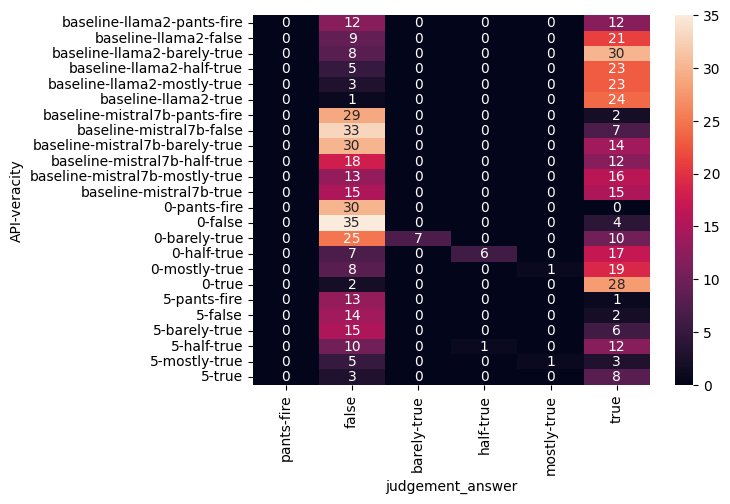

In [22]:
sns.heatmap(results, annot=True, fmt='.0f')